In [1]:
from wholeslidedata.iterators import create_batch_iterator
from matplotlib import pyplot as plt
from utils import init_plot, plot_batch, show_plot, print_dataset_statistics, mean_metrics, colors_2
import numpy as np
import torch
import torch.nn as nn
from pprint import pprint
import yaml
import os
from train_unet import load_config
import matplotlib.patches as mpatches
from tqdm.notebook import tqdm

In [2]:
def plot_aug_batch(x, y, x_t, y_t, patches=4):
    """ Plots the normal batch vs the augmented one.
    """
    patches = min(len(x), patches)

    green_patch = mpatches.Patch(color='green', label='NDBE', alpha=0.5)
    red_patch = mpatches.Patch(color='red', label='LGD/HGD', alpha=0.5)

    # show just the image
    fig, axes = plt.subplots(3, patches, figsize=(15, 10), squeeze=False)
    plt.legend(handles=[green_patch, red_patch], bbox_to_anchor=(1.05, 1.0), loc='upper left', borderaxespad=0.,  prop={'size': 10})
    plot_batch(axes, 0, x[:patches], np.zeros_like(y)[:patches], alpha=0.3, colors=colors_2)
    plot_batch(axes, 1, x[:patches], y[:patches], alpha=0.3, colors=colors_2)
    plot_batch(axes, 2, x_t[:patches], y_t[:patches], alpha=0.3, colors=colors_2)
    plt.tight_layout()
    plt.show()

In [3]:
# config path
base_dir = '/home/mbotros/code/barrett_gland_grading/'
user_config = os.path.join(base_dir, 'configs/plot_config.yml')

# lets print some configs
with open(user_config, 'r') as yamlfile:
    data = yaml.load(yamlfile, Loader=yaml.FullLoader)
    
for k, v in data['wholeslidedata']['default'].items():
    print('{}: {}'.format(k, v))

yaml_source: test.yml
seed: 2
associations: {'exact_match': True}
label_map: {'ndbe-g': 1, 'lgd-g': 2, 'hgd-g': 3}
annotation_sources: {'filters': ['xml']}
batch_shape: {'batch_size': 4, 'spacing': 1, 'shape': [512, 512, 3]}
label_sampler: {'attribute': 'OrderedLabelSampler'}
annotation_sampler: {'attribute': 'OrderedAnnotationSampler'}
point_sampler: {'attribute': 'UniformPointSampler'}


In [4]:
for k, v in data['wholeslidedata']['training'].items():
    print('{}: {}'.format(k, v))

batch_callbacks: [{'module': 'wholeslidedata.accessories.albumentations.callbacks', 'attribute': 'AlbumentationsAugmentationsCallback', 'augmentations': [{'RandomRotate90': {'p': 1}}, {'Flip': {'p': 1}}, {'RandomGamma': {'gamma_limit': [50, 100], 'p': 0.5}}, {'ColorJitter': {'brightness': 0.1, 'contrast': 0.1, 'saturation': 0.1, 'hue': 0.1, 'p': 0.5}}]}]


In [5]:
# lets get some batches (validation)
nr_batches = 10
normal_batches = []

with create_batch_iterator(mode='validation',
                           user_config=user_config,
                           cpus=1) as training_batch_generator:
    
    for idx in tqdm(range(nr_batches)) :
        x, y, info = next(training_batch_generator)
        normal_batches.append((x, y))

  0%|          | 0/10 [00:00<?, ?it/s]

In [6]:
# training configuration has augmentations
for k, v in data['wholeslidedata']['training'].items():
    print('{}: {}'.format(k, v))

batch_callbacks: [{'module': 'wholeslidedata.accessories.albumentations.callbacks', 'attribute': 'AlbumentationsAugmentationsCallback', 'augmentations': [{'RandomRotate90': {'p': 1}}, {'Flip': {'p': 1}}, {'RandomGamma': {'gamma_limit': [50, 100], 'p': 0.5}}, {'ColorJitter': {'brightness': 0.1, 'contrast': 0.1, 'saturation': 0.1, 'hue': 0.1, 'p': 0.5}}]}]


In [7]:
augmented_batches = []

with create_batch_iterator(mode='training',
                           user_config=user_config,
                           cpus=1) as training_batch_generator:
    
    for idx in tqdm(range(nr_batches)) :
        x, y, info = next(training_batch_generator)
        augmented_batches.append((x, y))

  0%|          | 0/10 [00:00<?, ?it/s]

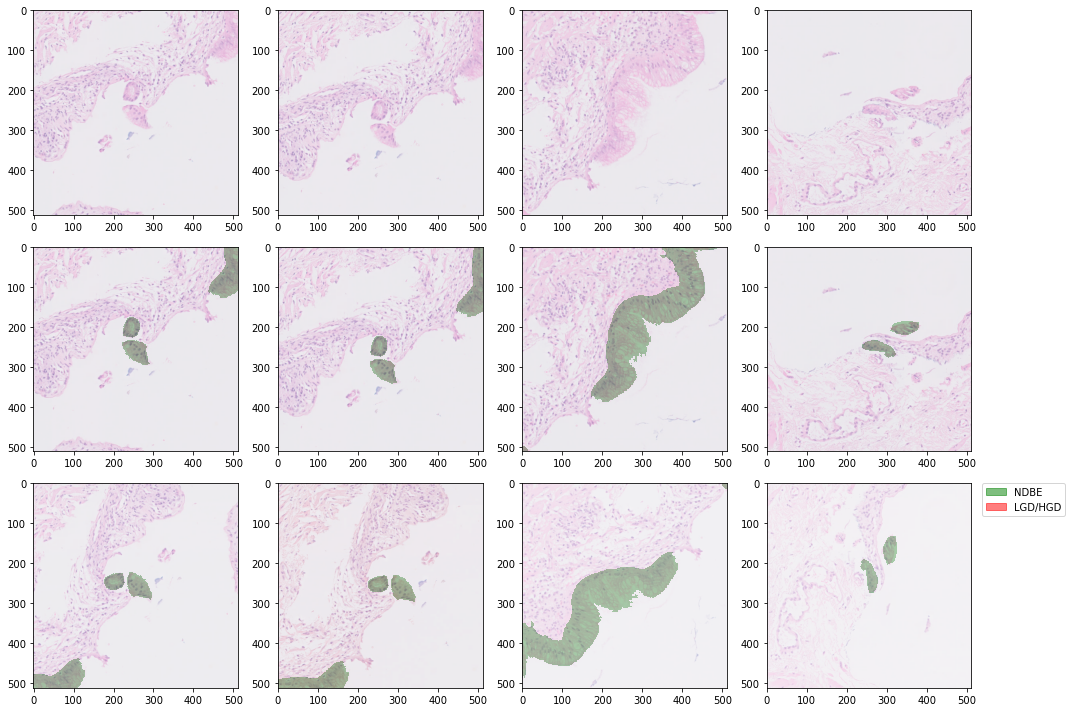

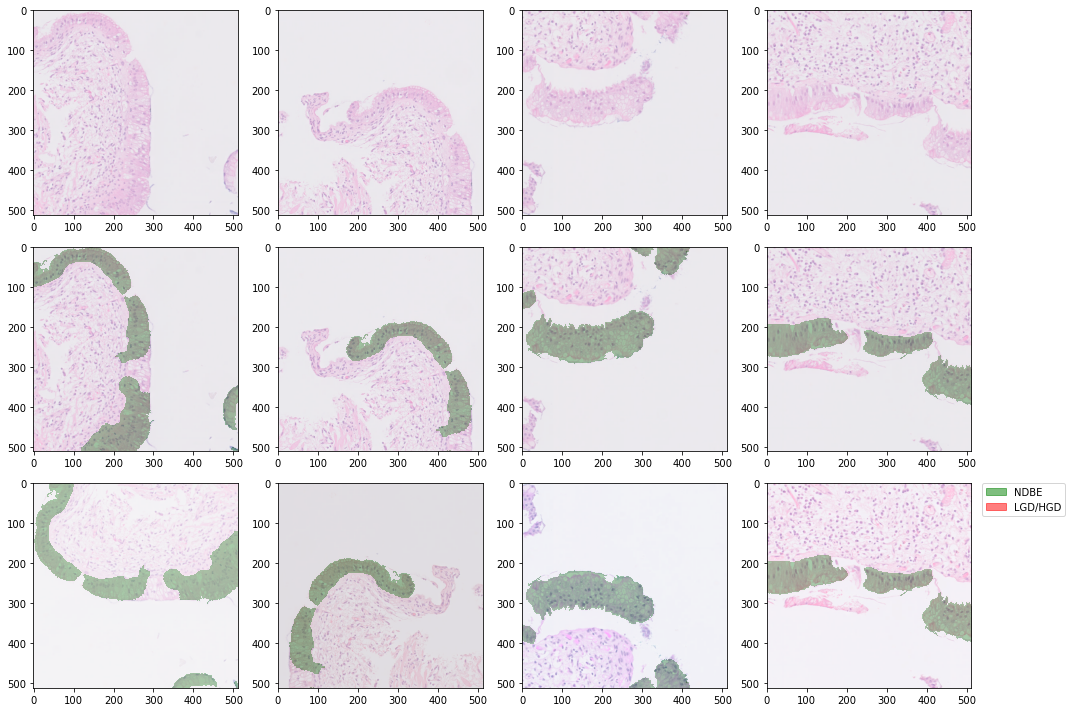

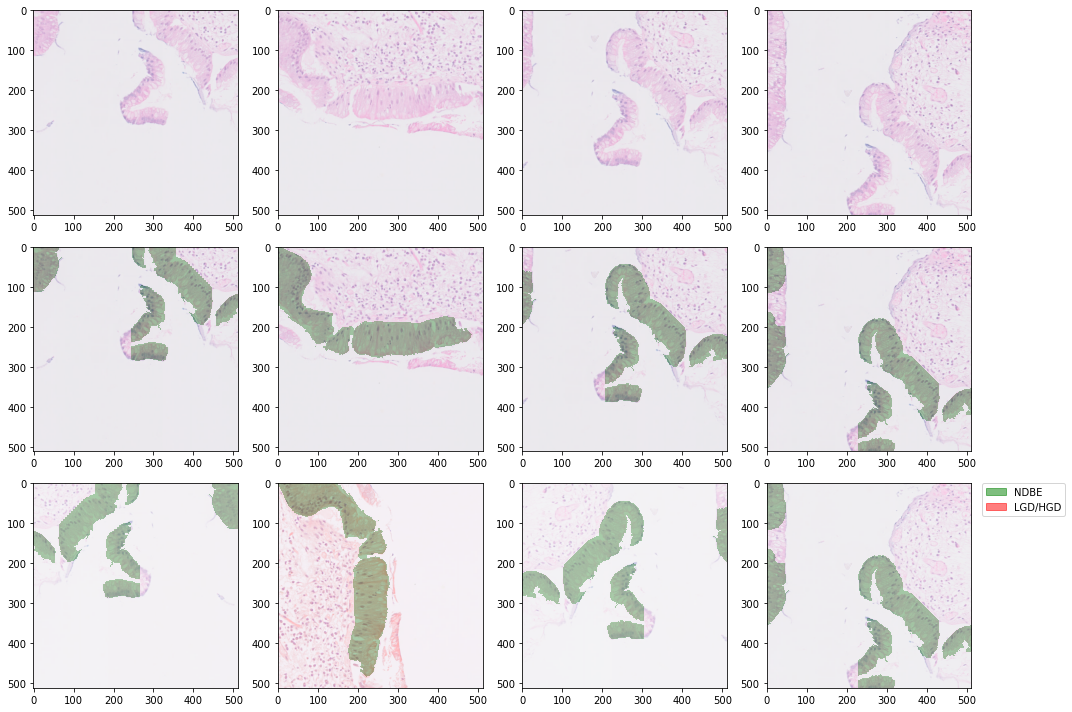

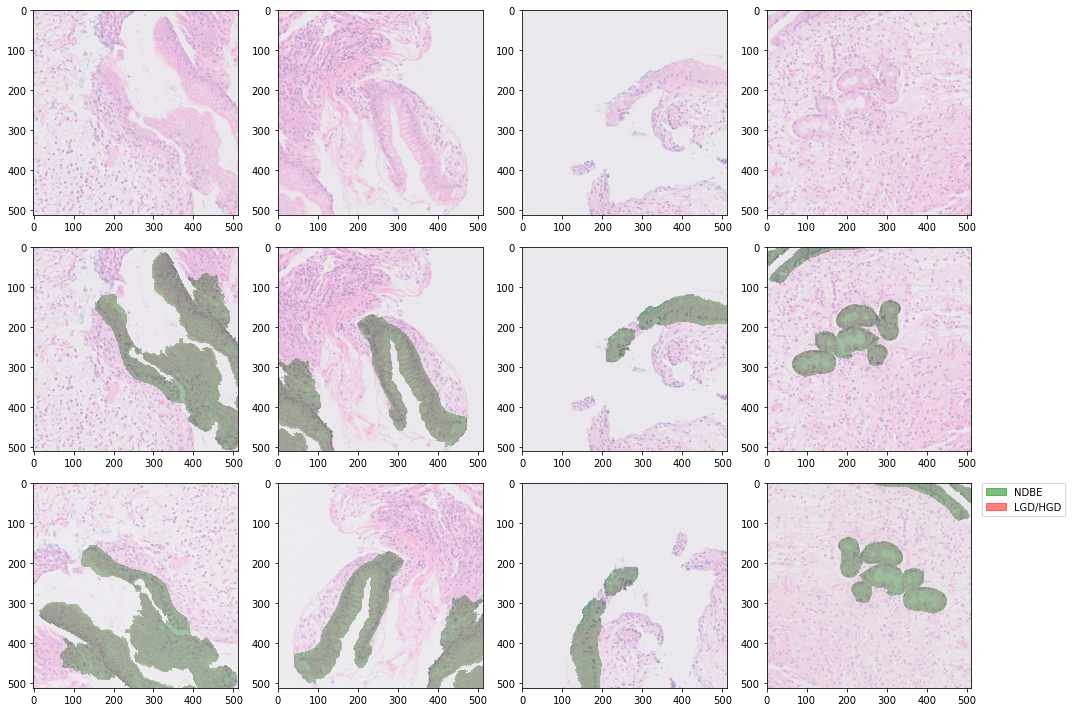

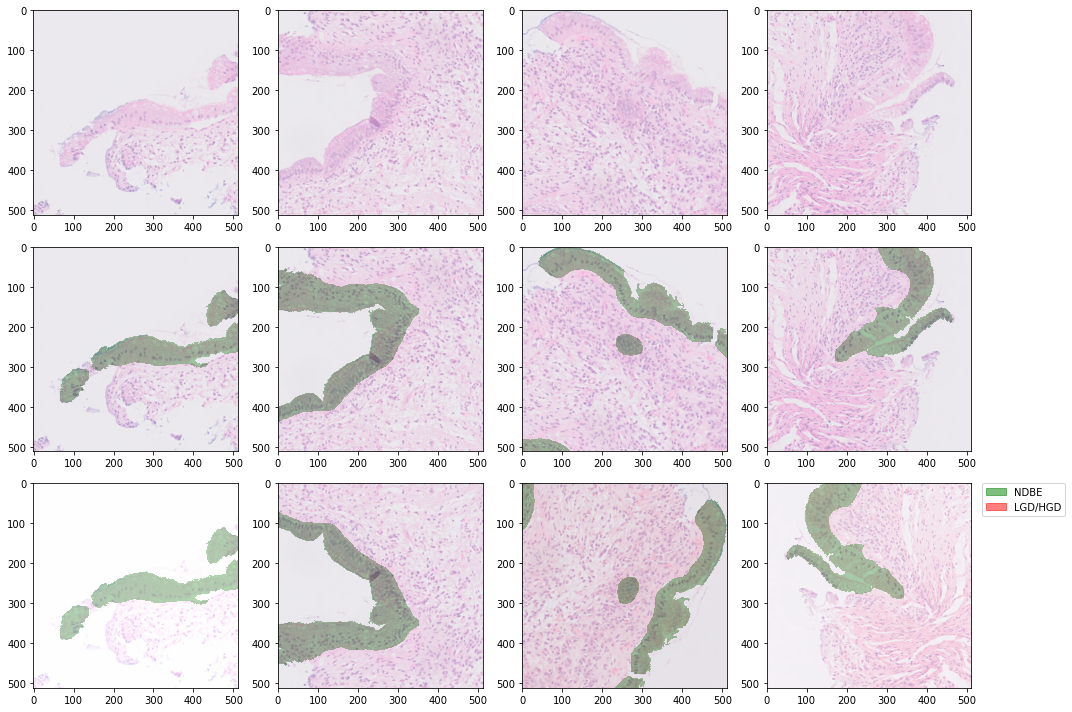

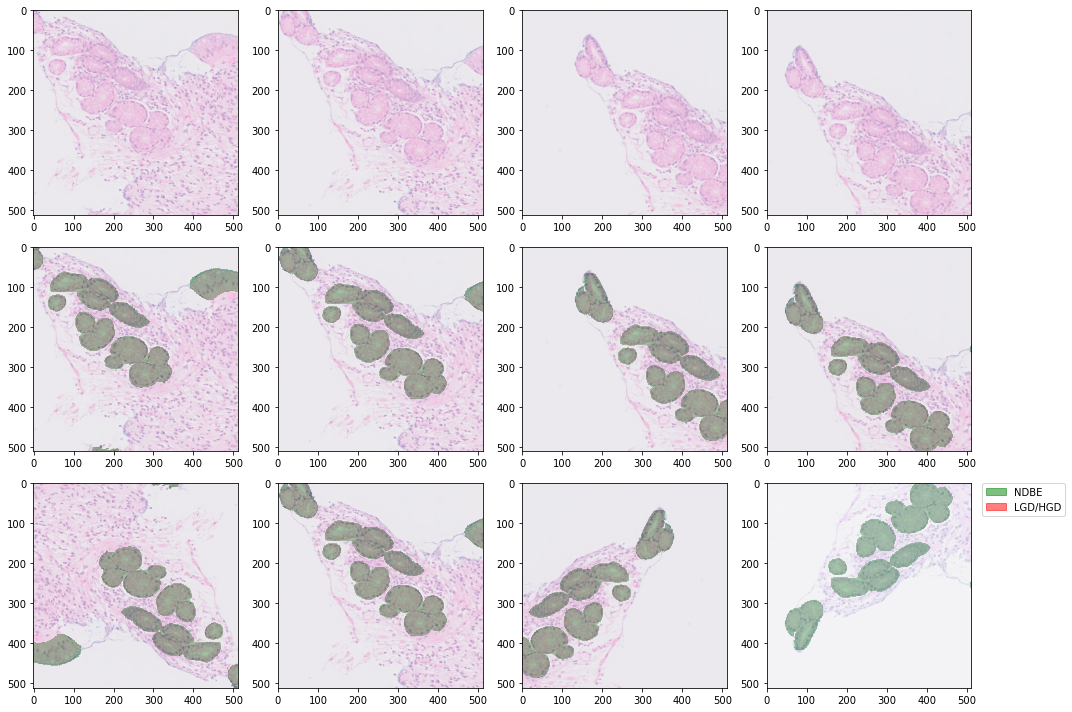

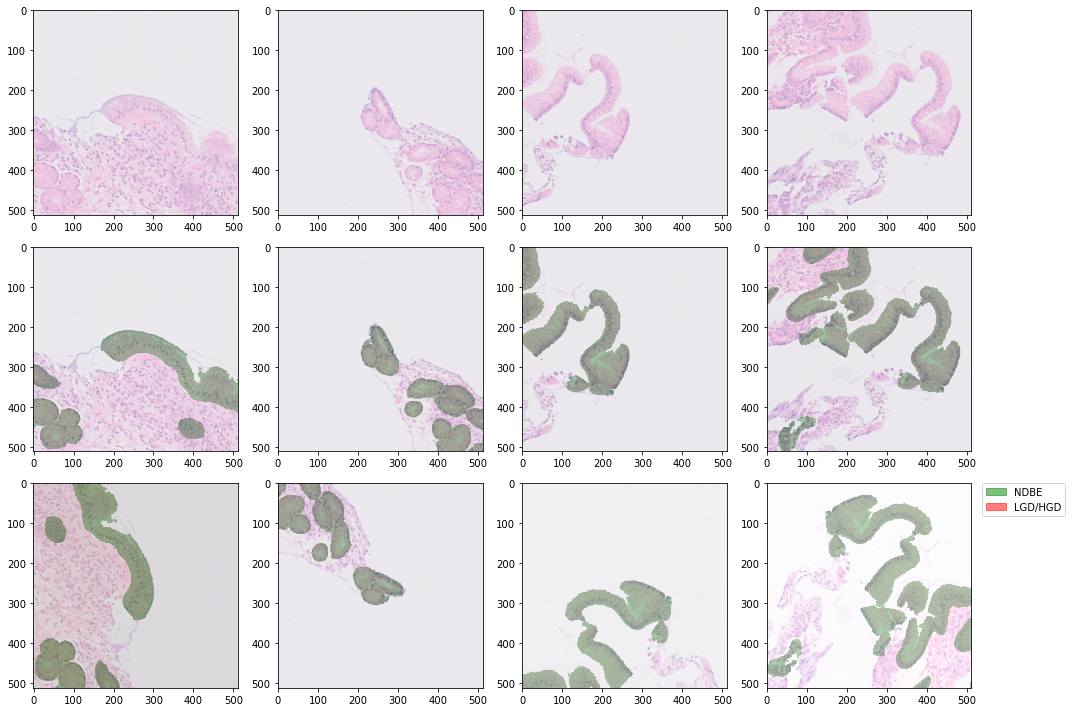

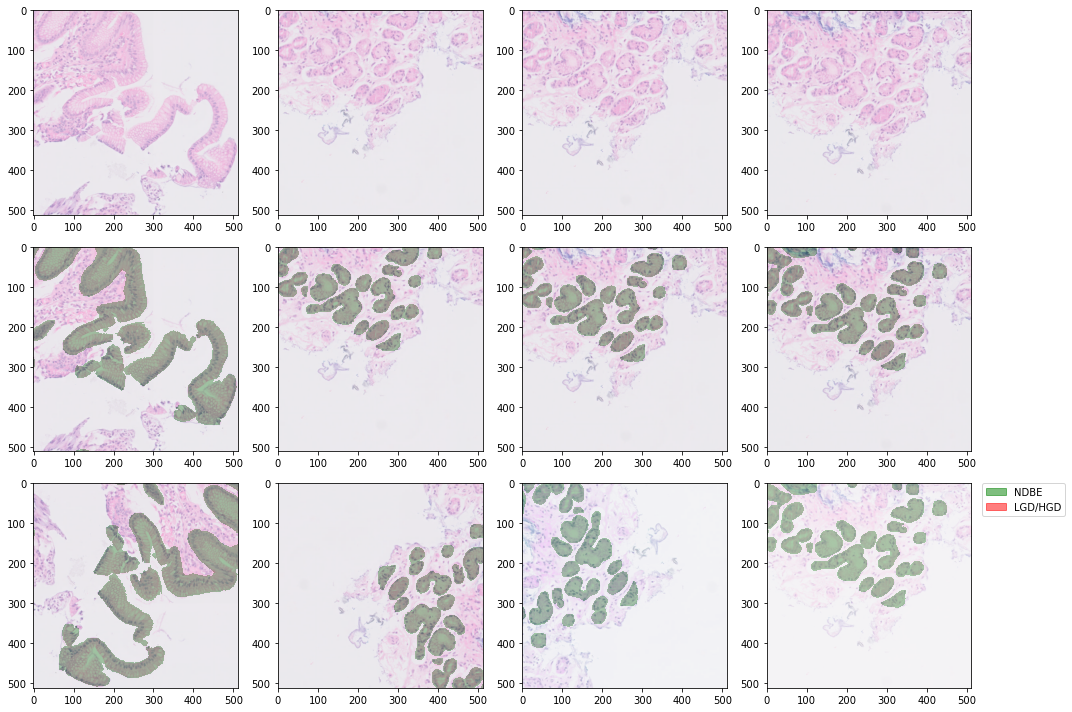

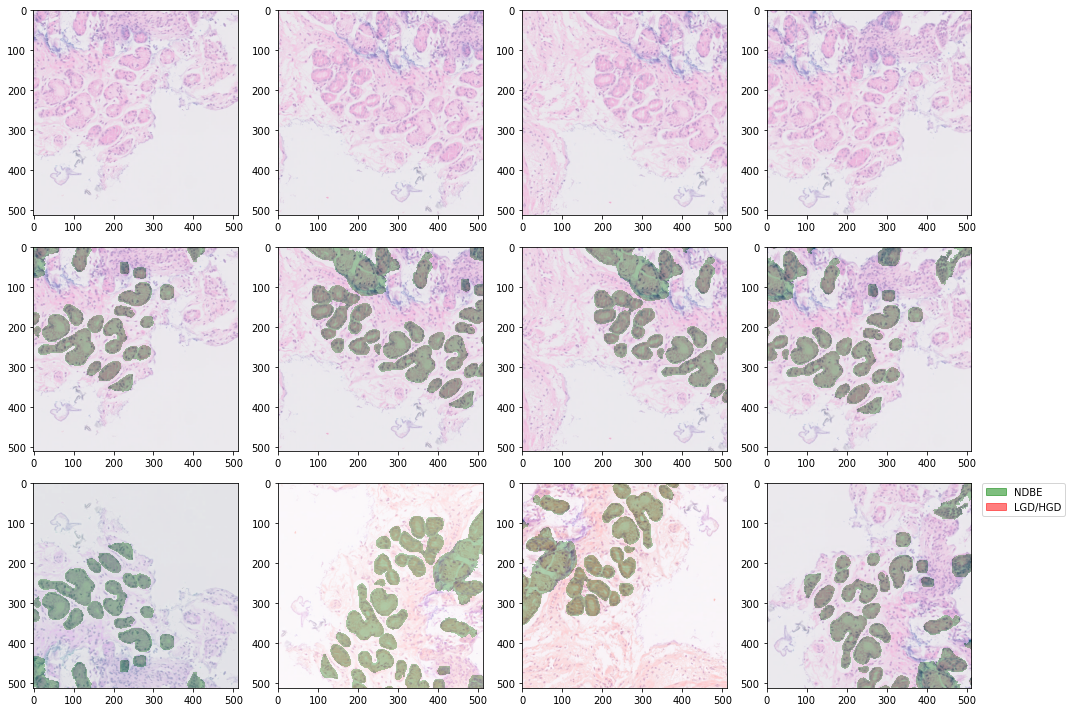

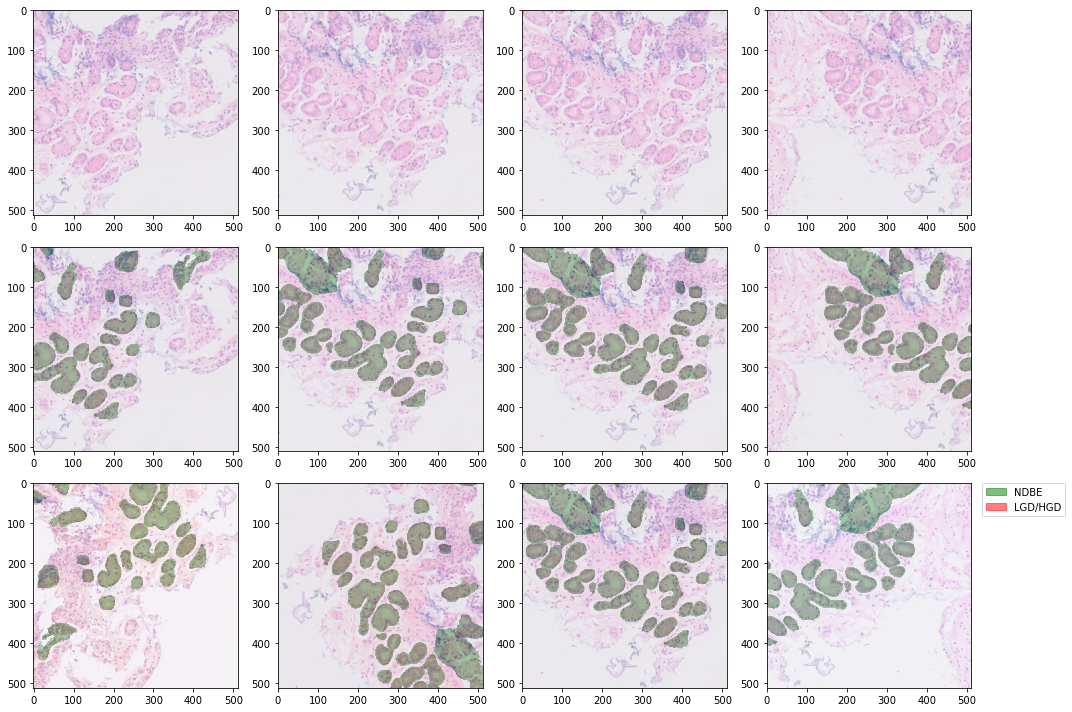

In [8]:
for (x, y), (x_t, y_t) in zip(normal_batches, augmented_batches):
    plot_aug_batch(x, y, x_t, y_t)
    print()